In [1]:
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact


In [2]:
dataset = pd.read_csv(r"C:\Users\ASUS VIVOBOOK\Downloads\Bioinformatics\1002080780.csv")


In [3]:
p_values = []
for index, row in dataset.iterrows():
    contingency_table = [[row['Case_Num_C_Allele'], row['Case_Num_T_Allele']],
                         [row['Control_Num_C_Allele'], row['Control_Num_T_Allele']]]
    odds_ratio, p_value = fisher_exact(contingency_table, alternative='greater')
    p_values.append(p_value)


In [4]:
significant_snps = []
for p_value in p_values:
    is_significant = p_value <= 5e-8
    significant_snps.append(is_significant)

results_df = pd.DataFrame({
    'SNP_Name': dataset['SNP'],
    'p_value': p_values,
    'is_significant': significant_snps
})

results_df.to_csv('results.csv', index=False)


In [5]:
desired_alpha = 0.05
total_tests = 1000

bonferroni_corrected_p = desired_alpha / total_tests


In [6]:
bonferroni_significant_snps = []
for p_value in p_values:
    is_significant = p_value <= bonferroni_corrected_p
    bonferroni_significant_snps.append(is_significant)

results_df = pd.DataFrame({
    'SNP_Name': dataset['SNP'],
    'p_value': p_values,
    'is_significant': significant_snps,
    'is_bonferroni_significant': bonferroni_significant_snps
})

results_df.to_csv('results.csv', index=False)


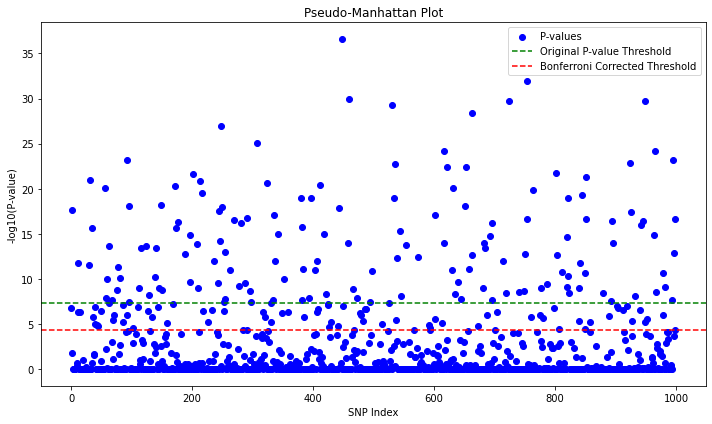

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Load the results from the CSV file
results_df = pd.read_csv('results.csv')

# Extract relevant data
p_values = results_df['p_value']
bonferroni_p_value = bonferroni_corrected_p  # Calculate the Bonferroni-corrected p-value
original_p_value_threshold = 5e-8  # Set your original p-value threshold here

# Calculate -log10(p-values)
neg_log_p_values = -np.log10(p_values)
neg_log_bonferroni = -np.log10(bonferroni_p_value)
neg_log_p_value_threshold = -np.log10(original_p_value_threshold)

# SNP indices
snp_indices = np.arange(len(p_values))

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(snp_indices, neg_log_p_values, color='blue', label='P-values')
plt.axhline(y=neg_log_p_value_threshold, color='green', linestyle='--', label='Original P-value Threshold')
plt.axhline(y=neg_log_bonferroni, color='red', linestyle='--', label='Bonferroni Corrected Threshold')

# Set labels and title
plt.xlabel('SNP Index')
plt.ylabel('-log10(P-value)')
plt.title('Pseudo-Manhattan Plot')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


